In [15]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [16]:
pwd1 = '/home/alyosha/Music/test1.wav'
pwd2 = '/home/alyosha/Music/test2.mp3'

In [17]:
x1, fps1 = librosa.load(pwd1, sr=48000)
x2, fps2 = librosa.load(pwd2, sr=48000)
t1 = np.arange(len(x1)) / fps1
t2 = np.arange(len(x2)) / fps2

/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


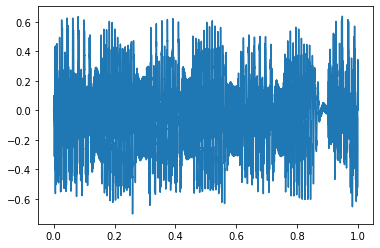

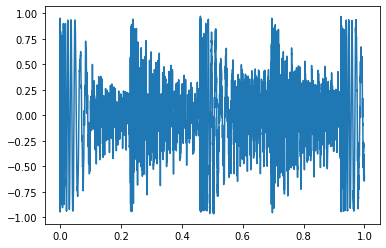

In [20]:
%matplotlib inline

plt.figure()
plt.plot(t1, x1)
plt.show()

plt.figure()
plt.plot(t2, x2)
plt.show()

In [19]:
def crop_time(t, x, tMax):
    idxLast = np.where(t > tMax)[0][0]
    return t[:idxLast], x[:idxLast]

t1, x1 = crop_time(t1, x1, 1)
t2, x2 = crop_time(t2, x2, 1)

## Attenuation model

We are receiving signal using a spherical microphone of radius 1cm. Given it is sufficiently far, it will receive signal of proportional to its surface disk projection $\pi r_0^2$. Sound spreads spherically from a point source at distance $r$. Attenuation of the signal due to distance is then

$$A(r, r_0) = \frac{\pi r_0^2}{4 \pi r^2} = \frac{r_0^2}{4 r^2}$$

Have two sources at positions $x^s_1$ and $x^s_2$, and two targets at positions $x^t_1$ and $x^t_2$. Given the source signals $s_1$ and $s_2$, the target received signals are

$$t_1(t) = A(d_{11}) s_1(t - \frac{d_{11}}{c}) + A(d_{12}) s_2(t - \frac{d_{12}}{c})$$
$$t_2(t) = A(d_{21}) s_1(t - \frac{d_{21}}{c}) + A(d_{22}) s_2(t - \frac{d_{22}}{c})$$

where the distance between a source and a target $d_{ij} = |x_i^t - x_j^s|$. If the distance between two targets $d_0 = |x_1^t - x_2^t|$ is known, the equations can be further constrained by

$$|d_{11} - d_{21}| \leq d_0$$
$$|d_{12} - d_{22}| \leq d_0$$

In [36]:
def circshift(x, t):
    return np.hstack([x[t:], x[:t]])

t1 = 0.5 * circshift(x1, -100) + 0.5 * circshift(x2, -50)
t2 = 0.5 * circshift(x1, -80) + 0.5 * circshift(x2, -20)

<IPython.core.display.Javascript object>


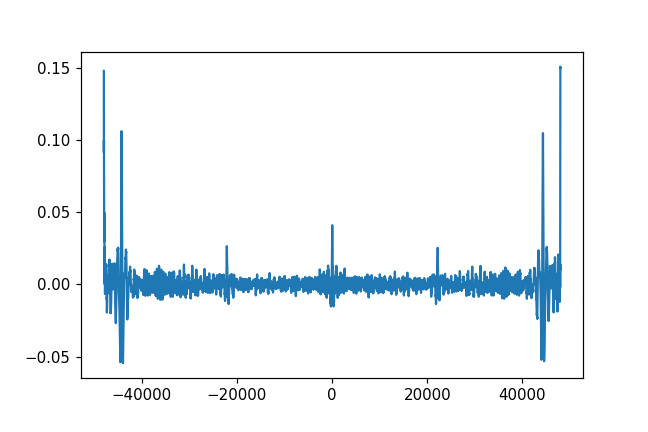

In [52]:
%matplotlib notebook
corrC = correlate_corrected(t1, t2)

time = np.arange(-len(t1)+1, +len(t1))

plt.figure()
plt.plot(time, corrC)

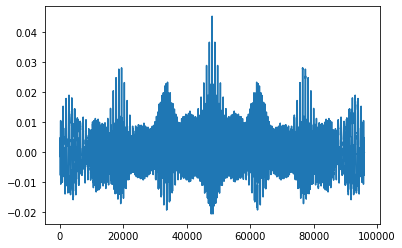

In [35]:
def correlate_corrected(x, y=None):
    if y is None:
        y = x
    n = len(x)
    corr = np.correlate(x, y, mode='full')
    c = np.hstack([np.arange(1, n+1), np.arange(1, n)[::-1]])
    rez = corr / c
#     rez /= rez[n]
    return rez
    
corrC = correlate_corrected(x1)

plt.figure()
plt.plot(corrC)
plt.show()

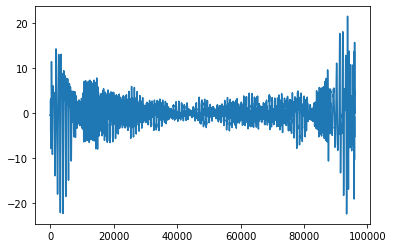

In [34]:
corrC = correlate_corrected(x1, x2)

plt.figure()
plt.plot(corrC)
plt.show()